<a href="https://colab.research.google.com/github/prathyusha0310/ml_project/blob/master/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving ml_assignment - Sheet1(1).csv to ml_assignment - Sheet1(1).csv


In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving trainData - Sheet1.csv to trainData - Sheet1.csv


In [ ]:
#importing libraries
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import pandas as pd  
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import io

In [ ]:
#Training dataset
df_train_doc = pd.read_csv(io.BytesIO(uploaded1['ml_assignment - Sheet1(1).csv']))
train_y=df_train_doc['Average Delay time']
train_x=df_train_doc.drop(["Average Delay time"],axis=1)

#train_xx=df_train_doc['Avg. travel time']

#Testing dataset
df_test_doc = pd.read_csv(io.BytesIO(uploaded2['trainData - Sheet1.csv']))
test_y=df_test_doc['Average Delay time']
test_x=df_test_doc.drop(["Average Delay time"],axis=1)

#test_xx=df_test_doc['Avg. travel time']

In [ ]:
train_x.head()

,Avg. travel time,level of closure,duration of incident,avg. max QL,no. of lanes,peak hour,off-peak hour\n
0,66.52,0.5,60,131.18,2,1,0
1,246.62,1.0,60,310.45,4,1,0
2,283.40,1.0,60,345.56,2,1,0
3,51.60,0.5,60,115.45,2,1,0
4,249.72,0.5,60,310.79,2,1,0


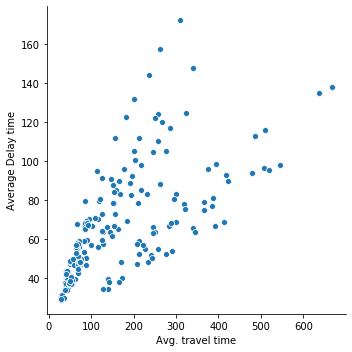

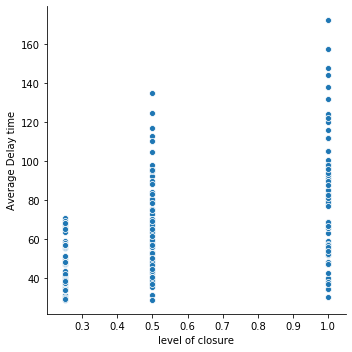

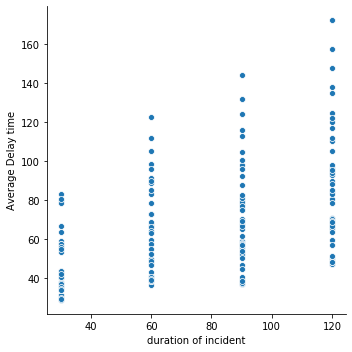

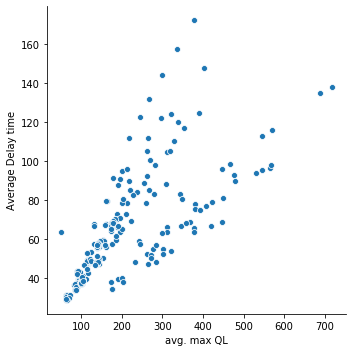

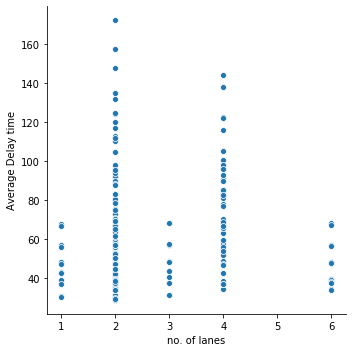

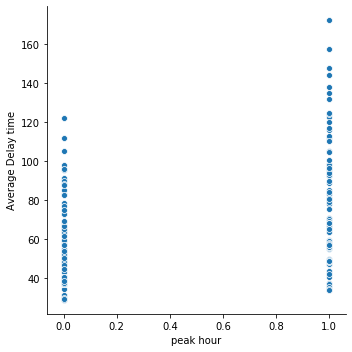

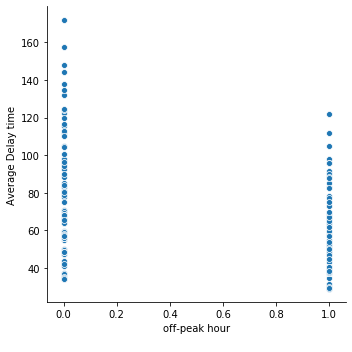

In [ ]:
#draw scatter plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

cols_indep = ['Avg. travel time','level of closure','duration of incident','avg. max QL','no. of lanes','peak hour','off-peak hour\n']
for col in cols_indep:
  sns.relplot(data=df_train_doc, x=col, y='Average Delay time')


In [ ]:
#scaling data
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#train_x = sc.fit_transform(train_x)
#test_x = sc.transform(test_x)

#train_xx = sc.fit_transform(train_xx)
#test_xx = sc.transform(test_xx)

In [ ]:
#train_x

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)

regressor.fit(train_x, train_y)

pred_y = regressor.predict(test_x)

pred_y

array([ 61.9405,  71.851 ,  70.2975,  48.365 ,  69.0265,  85.4485,
       111.841 ,  47.5215,  54.002 ,  49.047 ,  48.812 ,  97.764 ])

In [ ]:
from sklearn.svm import SVR
#create svm project
regressor=SVR(kernel='rbf',epsilon=1.0)

#train data

regressor.fit(train_x, train_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predict data

predicted= regressor.predict(test_x)
predicted

array([56.92345413, 57.05032575, 56.91451778, 49.89018771, 57.05032563,
       56.90388167, 56.91451778, 48.57472228, 56.91451778, 53.89141213,
       50.8281927 , 57.11250163])

In [ ]:
#applying linear regression
from  sklearn import linear_model
regression = linear_model.LinearRegression()

regression.fit(train_x, train_y)

#regression.fit(train_xx, train_y)

predicted = regression.predict(test_x)

#predicted = regression.predict(test_xx)

predicted

array([58.91601168, 83.57903111, 92.74357905, 57.22607392, 77.79727746,
       69.24156607, 76.63985945, 51.40235828, 40.15714143, 57.65232587,
       51.66660739, 73.93711905])